**Tasks for Part 6 - Project 1 Final**

1) Your first task is to build a linear regression model to predict sales.

-Build a linear regression model.

-Evaluate the performance of your model based on r^2.

-Evaluate the performance of your model based on rmse.

2) Your second task is to build a regression tree model to predict sales.

-Build a simple regression tree model.

-Compare the performance of your model based on r^2.

-Compare the performance of your model based on rmse.  

3) You now have tried 2 different models on your data set. You need to determine which model to implement.

-Overall, which model do you recommend?

-Justify your recommendation.

4) To finalize this project, complete a README in your GitHub repository including:

-An overview of the project

-2 relevant insights from the data (supported with reporting quality visualizations)

-Summary of the model and its evaluation metrics
Final recommendations.

In [1635]:
# Import Libraries, Mount your drive and load in your data set
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import set_config
set_config(display='diagram')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1636]:
# Load Dataframe
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [1637]:
# Statistical Info
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [1638]:
# Check the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [1639]:
# Check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [1640]:
# Check for Missing Values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [1641]:
# Check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [1642]:
# Drop Unwanted Columns
df = df.drop(columns=['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'])
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


In [1643]:
# Check for Duplicates
df.duplicated().sum()

0

In [1644]:
# Find and fix any inconsistent categories of data 
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [1645]:
df['Item_Fat_Content']= df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content']= df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content']= df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Data Types:

Numeric: Item_Weight, Item_Visibility, Item_MRP, 

Nominal: Item_Fat_Content, Item_Type, Outlet_Location_Type, Outlet_Type

Ordinal: Outlet_size, Outlet_Location_Type

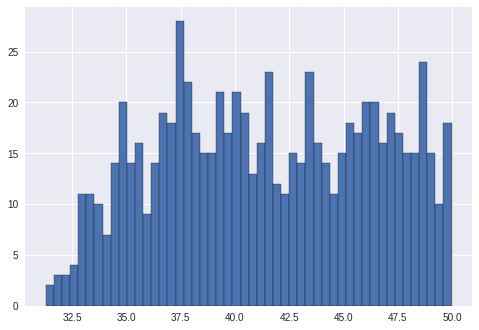

In [1646]:
# Histogram to view the distributions of various features in your dataset.
# Histogram of Item MRP
plt.style.use('seaborn')
price_filter = df.loc[:, 'Item_MRP'] <= 50
df.loc[price_filter, 'Item_MRP'].hist(bins = 50,
                                   edgecolor='black')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


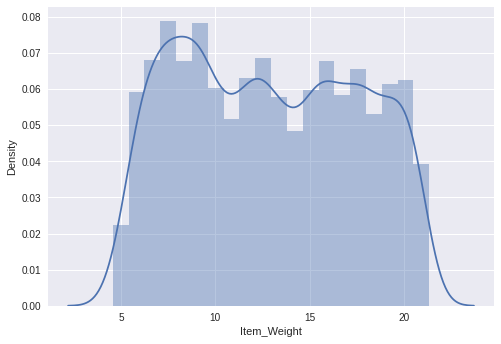

In [1647]:
# Displot to view the distributions of Item_Weight
sns.distplot(df['Item_Weight'])

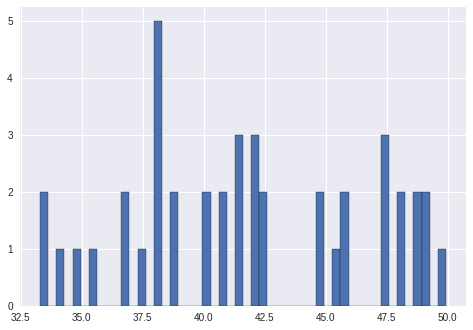

In [1648]:
# Histogram of Item Outlet Sales
plt.style.use('seaborn')
price_filter = df.loc[:, 'Item_Outlet_Sales'] <= 50
df.loc[price_filter, 'Item_Outlet_Sales'].hist(bins = 50,
                                   edgecolor='black')

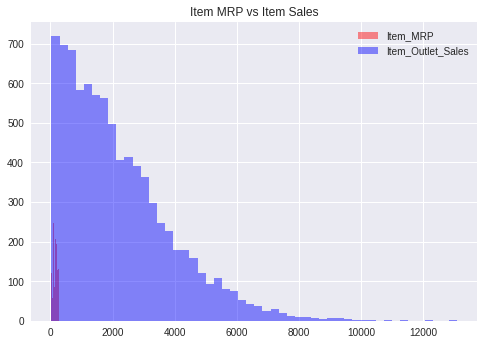

In [1649]:
# Histogram of Item MRP vs Item Sales
plt.hist(df['Item_MRP'], bins=50, alpha=0.45, color='red')
plt.hist(df['Item_Outlet_Sales'], bins=50, alpha=0.45, color='blue')
plt.title("Item MRP vs Item Sales")
plt.legend(['Item_MRP', 
            'Item_Outlet_Sales'])
plt.show()

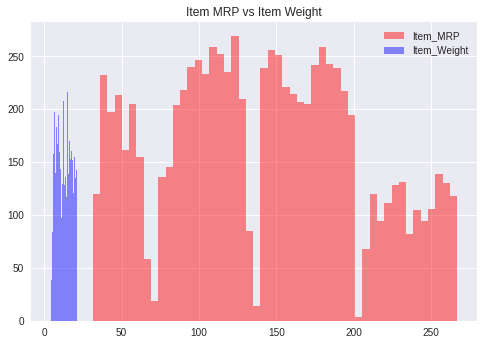

In [1650]:
#Histogram of Item MRP vs Item Weight
plt.hist(df['Item_MRP'], bins=50, alpha=0.45, color='red')
plt.hist(df['Item_Weight'], bins=50, alpha=0.45, color='blue')
plt.title("Item MRP vs Item Weight")
plt.legend(['Item_MRP', 
            'Item_Weight'])
plt.show()

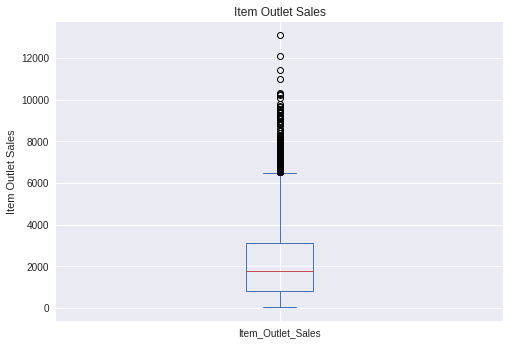

In [1651]:
# Boxplot of Item Outlet Sales, unfortunately there are to many outliers for this to be useful, this is due to extreme contrast of some sales compared to the median
df['Item_Outlet_Sales'].plot(kind='box')
plt.title('Item Outlet Sales')
plt.ylabel('Item Outlet Sales')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

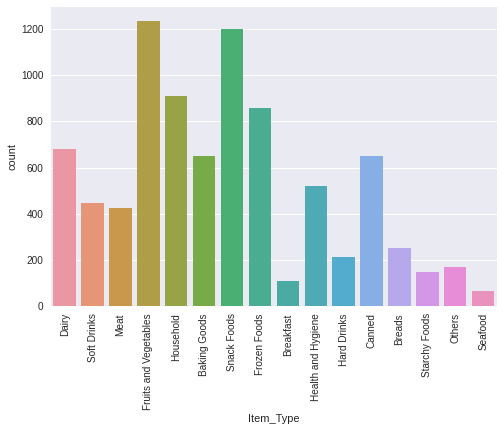

In [1652]:
# Countplot of Item_Type to give a visual representation of the the amount of items by type. 
l = list(df['Item_Type'].unique())
chart = sns.countplot(df["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

Text(0, 0.5, 'Outlet Sales ($)')

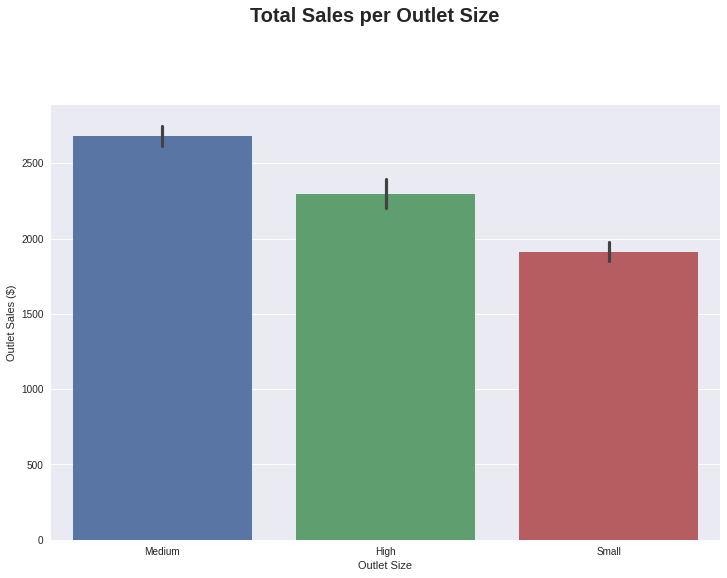

In [1653]:
fig, axes = plt.subplots (figsize=(12,8))
sns.barplot(data=df, x='Outlet_Size', y = 'Item_Outlet_Sales')
fig.suptitle('Total Sales per Outlet Size', fontsize = 20, fontweight = 'bold', y=1.05)

plt.xlabel('Outlet Size')
plt.ylabel('Outlet Sales ($)')

In [1654]:
# Heatmap of the correlation between features.
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.567574
Item_Outlet_Sales,0.014123,-0.128625,0.567574,1.000000


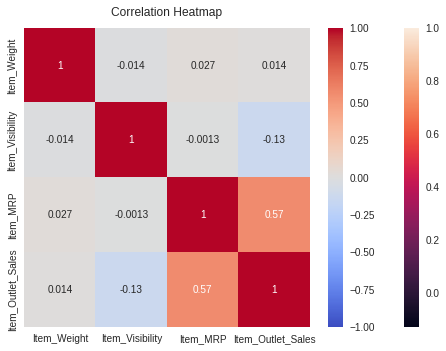

In [1655]:
# An example of a square correlation heatmap comparing the data
sns.heatmap(df.corr());
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


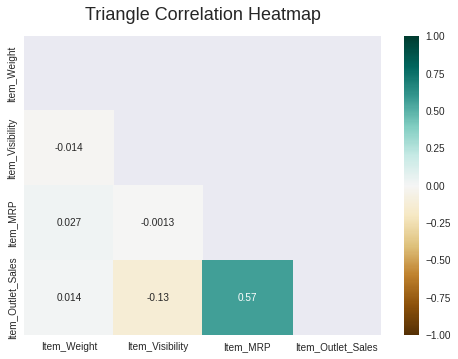

In [1656]:
# An example of a triangle correlation heatmap comparing the data
# Using this method makes the limited data easier to view as there is not any duplicates
np.triu(np.ones_like(df.corr()))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Text(0.5, 1.0, 'Outlet Type vs Outlet Sales')

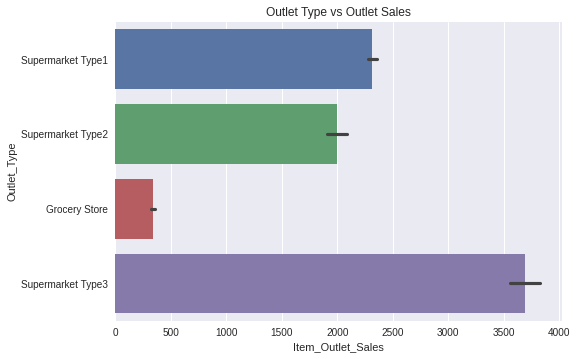

In [1657]:
# Barplot of Outlet Type vs Outlet Sales
sns.barplot(data=df, y='Outlet_Type', x='Item_Outlet_Sales');
plt.title('Outlet Type vs Outlet Sales')

In [1658]:
# Code the Ordinal data
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [1659]:
# Ordinal Encoding 'Outlet_size'
df_outsize = {'High':2, 'Medium':1,'Small':0}
df['Outlet_Size'].replace(df_outsize, inplace=True)
df['Outlet_Size']

0       1.0
1       1.0
2       1.0
3       NaN
4       2.0
       ... 
8518    2.0
8519    NaN
8520    0.0
8521    1.0
8522    0.0
Name: Outlet_Size, Length: 8523, dtype: float64

In [1660]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [1661]:
# Ordinal Encoding 'Outlet_Location_Type'
df_outtype = {'Tier 3':2, 'Tier 2':1, 'Tier 1':0}
df['Outlet_Location_Type'].replace(df_outtype, inplace=True)
df['Outlet_Location_Type']

0       0
1       2
2       0
3       2
4       2
       ..
8518    2
8519    1
8520    1
8521    2
8522    0
Name: Outlet_Location_Type, Length: 8523, dtype: int64

In [1662]:
#one hot encoding
cols = ['Item_Type','Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(df[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.fit_transform(df[cols])).astype('int64')


#get feature columns
tr_oh.columns = OH_encoder.get_feature_names(cols)
te_oh.columns = OH_encoder.get_feature_names(cols)

# One-hot encoding removed index; put it back
tr_oh.index = df.index
te_oh.index = df.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired) 
tr_fe = pd.concat([df, tr_oh], axis=1)
te_fe = pd.concat([df, te_oh], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [1663]:
#Machine Learning models
y = df['Item_Outlet_Sales']
X = df.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [1664]:
#Imputing Any Missing Values
#Create Selector
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='float')

#Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

# Scaler
scaler = StandardScaler()

# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [1665]:
#Create Numeric Pipeline
#Numeric Pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler) 
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [1666]:
#Create Categorical Pipeline
cat_pipe = make_pipeline (freq_imputer, ohe)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [1667]:
#Create Tuple For Column Transformer
num_tuple = (numeric_pipe , num_selector)
cat_tuple = (cat_pipe, cat_selector)

In [1668]:
#Column Transformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder= 'passthrough' )
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f961622af90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f961622a090>)])

In [1669]:
#Fit on train Data
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f961622af90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f961622a090>)])

In [1670]:
#Transform Train and Test Data
X_train_process=preprocessor.transform(X_train)
X_test_process=preprocessor.transform(X_test)

In [1671]:
#Transform Array Data Into Dataframe
X_train_process_df = pd.DataFrame(X_train_process)
X_train_process_df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.508376,0.312906,0.854369,-1.309331,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.927845,0.380352,0.453623,0.371000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.000000,-1.260571,-0.820206,0.371000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
3,-0.649364,-0.923981,1.599138,0.371000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.741414,-0.395994,-1.674495,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,0.516995,-0.874007,-1.467195,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
1700,0.000000,-0.772303,0.765081,0.371000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1701,0.120829,-1.260571,-0.997053,-1.309331,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1702,1.332630,0.738737,-0.306729,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [1672]:
# Make and fit a linear regression model
scaler = StandardScaler()
lin_reg = LinearRegression()
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)

lin_reg_pipe.fit(X_train, y_train)
print("model score: %.3f" % lin_reg_pipe.score(X_test, y_test))

model score: 0.559


In [1673]:
# Create Model Predictions for Training and Testing Data
train_pred = lin_reg_pipe.predict(X_train)
test_pred = lin_reg_pipe.predict(X_test)

In [1674]:
# R^2 using Scikit-Learn
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}')

Model Training R2: 0.5613561391145023
Model Testing R2: 0.5593367100835789


In [1675]:
# RMSE using NumPy
train_RMSE = np.sqrt(np.mean(train_pred - y_train)**2)
test_RMSE = np.sqrt(np.mean(test_pred - y_test)**2)

print(f'Model Training RMSE: {train_RMSE}')
print(f'Model Testing RMSE: {test_RMSE}')

Model Training RMSE: 2.1136144477821571e-13
Model Testing RMSE: 24.24672071028787


In [1676]:
# Machine Learning models
y = df['Item_Outlet_Sales']
X = df.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [1677]:
# Imputing Any Missing Values
# Create Selector
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='float')

# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

# Scaler
scaler = StandardScaler()

# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [1678]:
# Create Numeric Pipeline
# Numeric Pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler) 
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [1679]:
#Create Categorical Pipeline
cat_pipe = make_pipeline (freq_imputer, ohe)
cat_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [1680]:
# Create Tuple For Column Transformer
num_tuple = (numeric_pipe , num_selector)
cat_tuple = (cat_pipe, cat_selector)

In [1681]:
# Column Transformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder= 'passthrough' )
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f96167900d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9616790310>)])

In [1682]:
# Fit on train Data
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f96167900d0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9616790310>)])

In [1683]:
# Transform Train and Test Data
X_train_process=preprocessor.transform(X_train)
X_test_process=preprocessor.transform(X_test)

In [1684]:
# Transform Array Data Into Dataframe
X_train_process_df = pd.DataFrame(X_train_process)
X_train_process_df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-0.508376,0.312906,0.854369,-1.309331,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.927845,0.380352,0.453623,0.371000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.000000,-1.260571,-0.820206,0.371000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
3,-0.649364,-0.923981,1.599138,0.371000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.741414,-0.395994,-1.674495,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,0.516995,-0.874007,-1.467195,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
1700,0.000000,-0.772303,0.765081,0.371000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1701,0.120829,-1.260571,-0.997053,-1.309331,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1702,1.332630,0.738737,-0.306729,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [1685]:
# Make and fit a random forrest model
scaler = StandardScaler()
rf = RandomForestRegressor(random_state = 42)
rf_pipe = make_pipeline(preprocessor, rf)

rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f96167900d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f9616790310>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [1686]:
# Predict values 
# Create Model Predictions for Training and Testing Data
train_pred = rf_pipe.predict(X_train)
test_pred = rf_pipe.predict(X_test)

In [1687]:
# Evaluate the model
rf_train_score = rf_pipe.score(X_train, y_train)
rf_test_score = rf_pipe.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9353756718626097
0.544375570847434


In [1688]:
# R^2 using Scikit-Learn
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}')

Model Training R2: 0.9353756718626097
Model Testing R2: 0.544375570847434


In [1689]:
# RMSE using NumPy
train_RMSE = np.sqrt(np.mean(train_pred - y_train)**2)
test_RMSE = np.sqrt(np.mean(test_pred - y_test)**2)

print(f'Model Training RMSE: {train_RMSE}')
print(f'Model Testing RMSE: {test_RMSE}')

Model Training RMSE: 6.435566535211194
Model Testing RMSE: 54.00833296025817


In [1690]:
# Tune your model
rf_7 = RandomForestRegressor(max_depth = 7, random_state = 42)
rf_7 = make_pipeline(preprocessor, rf)
rf_7.fit(X_train, y_train)
rf_7_train_score = rf_7.score(X_train, y_train)
rf_7_test_score = rf_7.score(X_test, y_test)
print(rf_7_train_score)
print(rf_7_test_score)

0.9353756718626097
0.544375570847434


In [1691]:
# Estimate max depths
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

35

In [1692]:
# Use a loop
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   rf = RandomForestRegressor(max_depth=depth)
   model = make_pipeline(preprocessor, rf)
   model.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = model.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = model.score(X_test, y_test)
   scores.head()

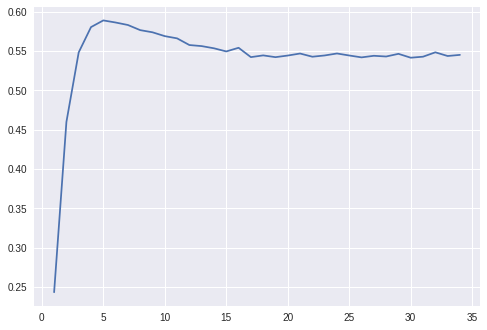

In [1693]:
# Plot the test score
plt.plot(scores['Test Score'])

In [1694]:
# Sort scores to find out best
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
5,0.588951,0.632426
6,0.586284,0.664651
7,0.583116,0.700116
4,0.58044,0.607550
8,0.576586,0.733648


Optimal max_depth 

> -  `max_depth` = 5 produced the best model with:
    - Training R^2: 0.632
    - Test R^2: 0.588

**Conclusion**

-The Items bought are more of Low Fat

-"Fruits and vegetables" and "Snack food" are the most sold items in all the stores with all sizes.

-The Item Outles sales are high for both Low Fat and Regular Item types, so its not justified why all the outlets have more low fat products than regular.

-The items with visibility near to zero is rarely purchased by the customers.

The "Outlet_Establishment_Year" has no effect on the sales made by any outlet, as the number of sales made or the mean of all years are nearly the same .